In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

In [13]:
raw_data = pd.read_csv(r'..\Datasets\student_data_new.csv')
raw_data.head(3)

,Timestamp,ID,Gender,State,Parent Education Level,Household Income Level,Study Duration,Study Frequency,Learning Style,Study Resources,Past Exam Practice,Study Space,Attendance,Study Impact by extracurricular activity,Teacher Support,Progress Monitoring,Performance,Score Level
0,2024-06-15 14:21:35,1,Male,Niger,Secondary school,Low income,More than 4 hours,4-6 times a week,Hands-on practice,Videos,Often,Yes,Almost always,No impact,Rarely,Often,I performed worse than expected,200 - 270
1,2024-03-29 09:58:23,2,Female,Edo,No formal education,High income,More than 4 hours,4-6 times a week,Group discussions,Videos,Often,Yes,Never,Hinders somewhat,Usually,Never,I performed better than expected,< 120
2,2024-04-07 22:24:46,3,Male,Kano,No formal education,Low income,2-4 hours,Every day,Listening to lectures,Past questions,Never,Yes,Almost always,No impact,Rarely,Sometimes,I performed worse than expected,120 - 200


In [15]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5398 entries, 0 to 5397
Data columns (total 18 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Timestamp                                 5398 non-null   object
 1   ID                                        5398 non-null   int64 
 2   Gender                                    5398 non-null   object
 3   State                                     5398 non-null   object
 4   Parent Education Level                    5398 non-null   object
 5   Household Income Level                    5398 non-null   object
 6   Study Duration                            5398 non-null   object
 7   Study Frequency                           5398 non-null   object
 8   Learning Style                            5398 non-null   object
 9   Study Resources                           5398 non-null   object
 10  Past Exam Practice                        5398 n

In [17]:
raw_data = raw_data.rename(columns={'Study Impact by extracurricular activity':'Extracurricular activity'})
raw_data.head(2)

,Timestamp,ID,Gender,State,Parent Education Level,Household Income Level,Study Duration,Study Frequency,Learning Style,Study Resources,Past Exam Practice,Study Space,Attendance,Extracurricular activity,Teacher Support,Progress Monitoring,Performance,Score Level
0,2024-06-15 14:21:35,1,Male,Niger,Secondary school,Low income,More than 4 hours,4-6 times a week,Hands-on practice,Videos,Often,Yes,Almost always,No impact,Rarely,Often,I performed worse than expected,200 - 270
1,2024-03-29 09:58:23,2,Female,Edo,No formal education,High income,More than 4 hours,4-6 times a week,Group discussions,Videos,Often,Yes,Never,Hinders somewhat,Usually,Never,I performed better than expected,< 120


In [91]:
data = raw_data.copy()

In [21]:
features_set1 = ['Gender','Parent Education Level','Household Income Level','Study Duration','Study Frequency',
            'Learning Style','Study Resources']

features_set2 = ['Past Exam Practice','Study Space','Attendance','Extracurricular activity',
             'Teacher Support','Progress Monitoring','Performance','Score Level']

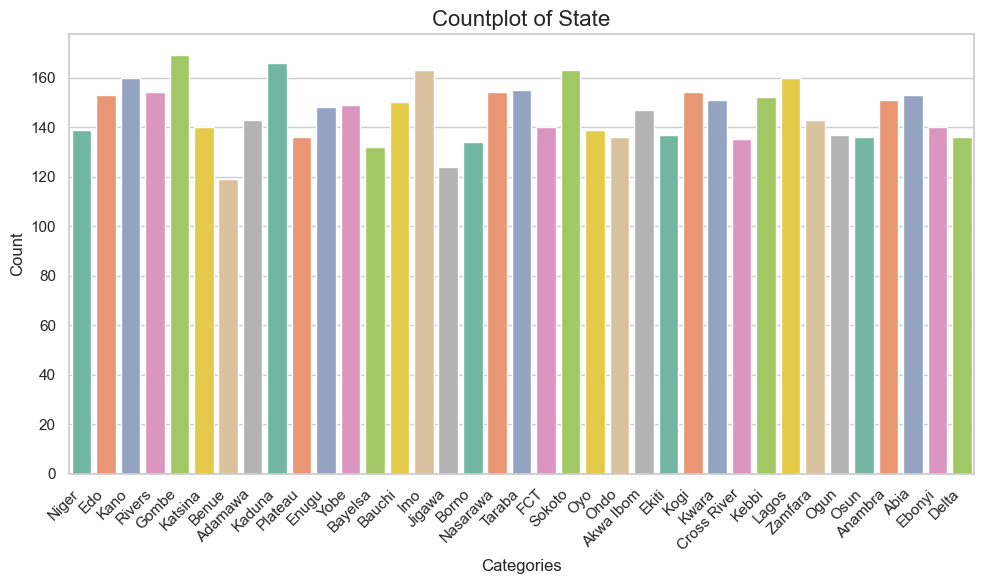

In [23]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.countplot(x='State', data=data, palette='Set2')
plt.xticks(rotation=45, ha='right')

plt.title('Countplot of State', fontsize=16)
plt.xlabel('Categories', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

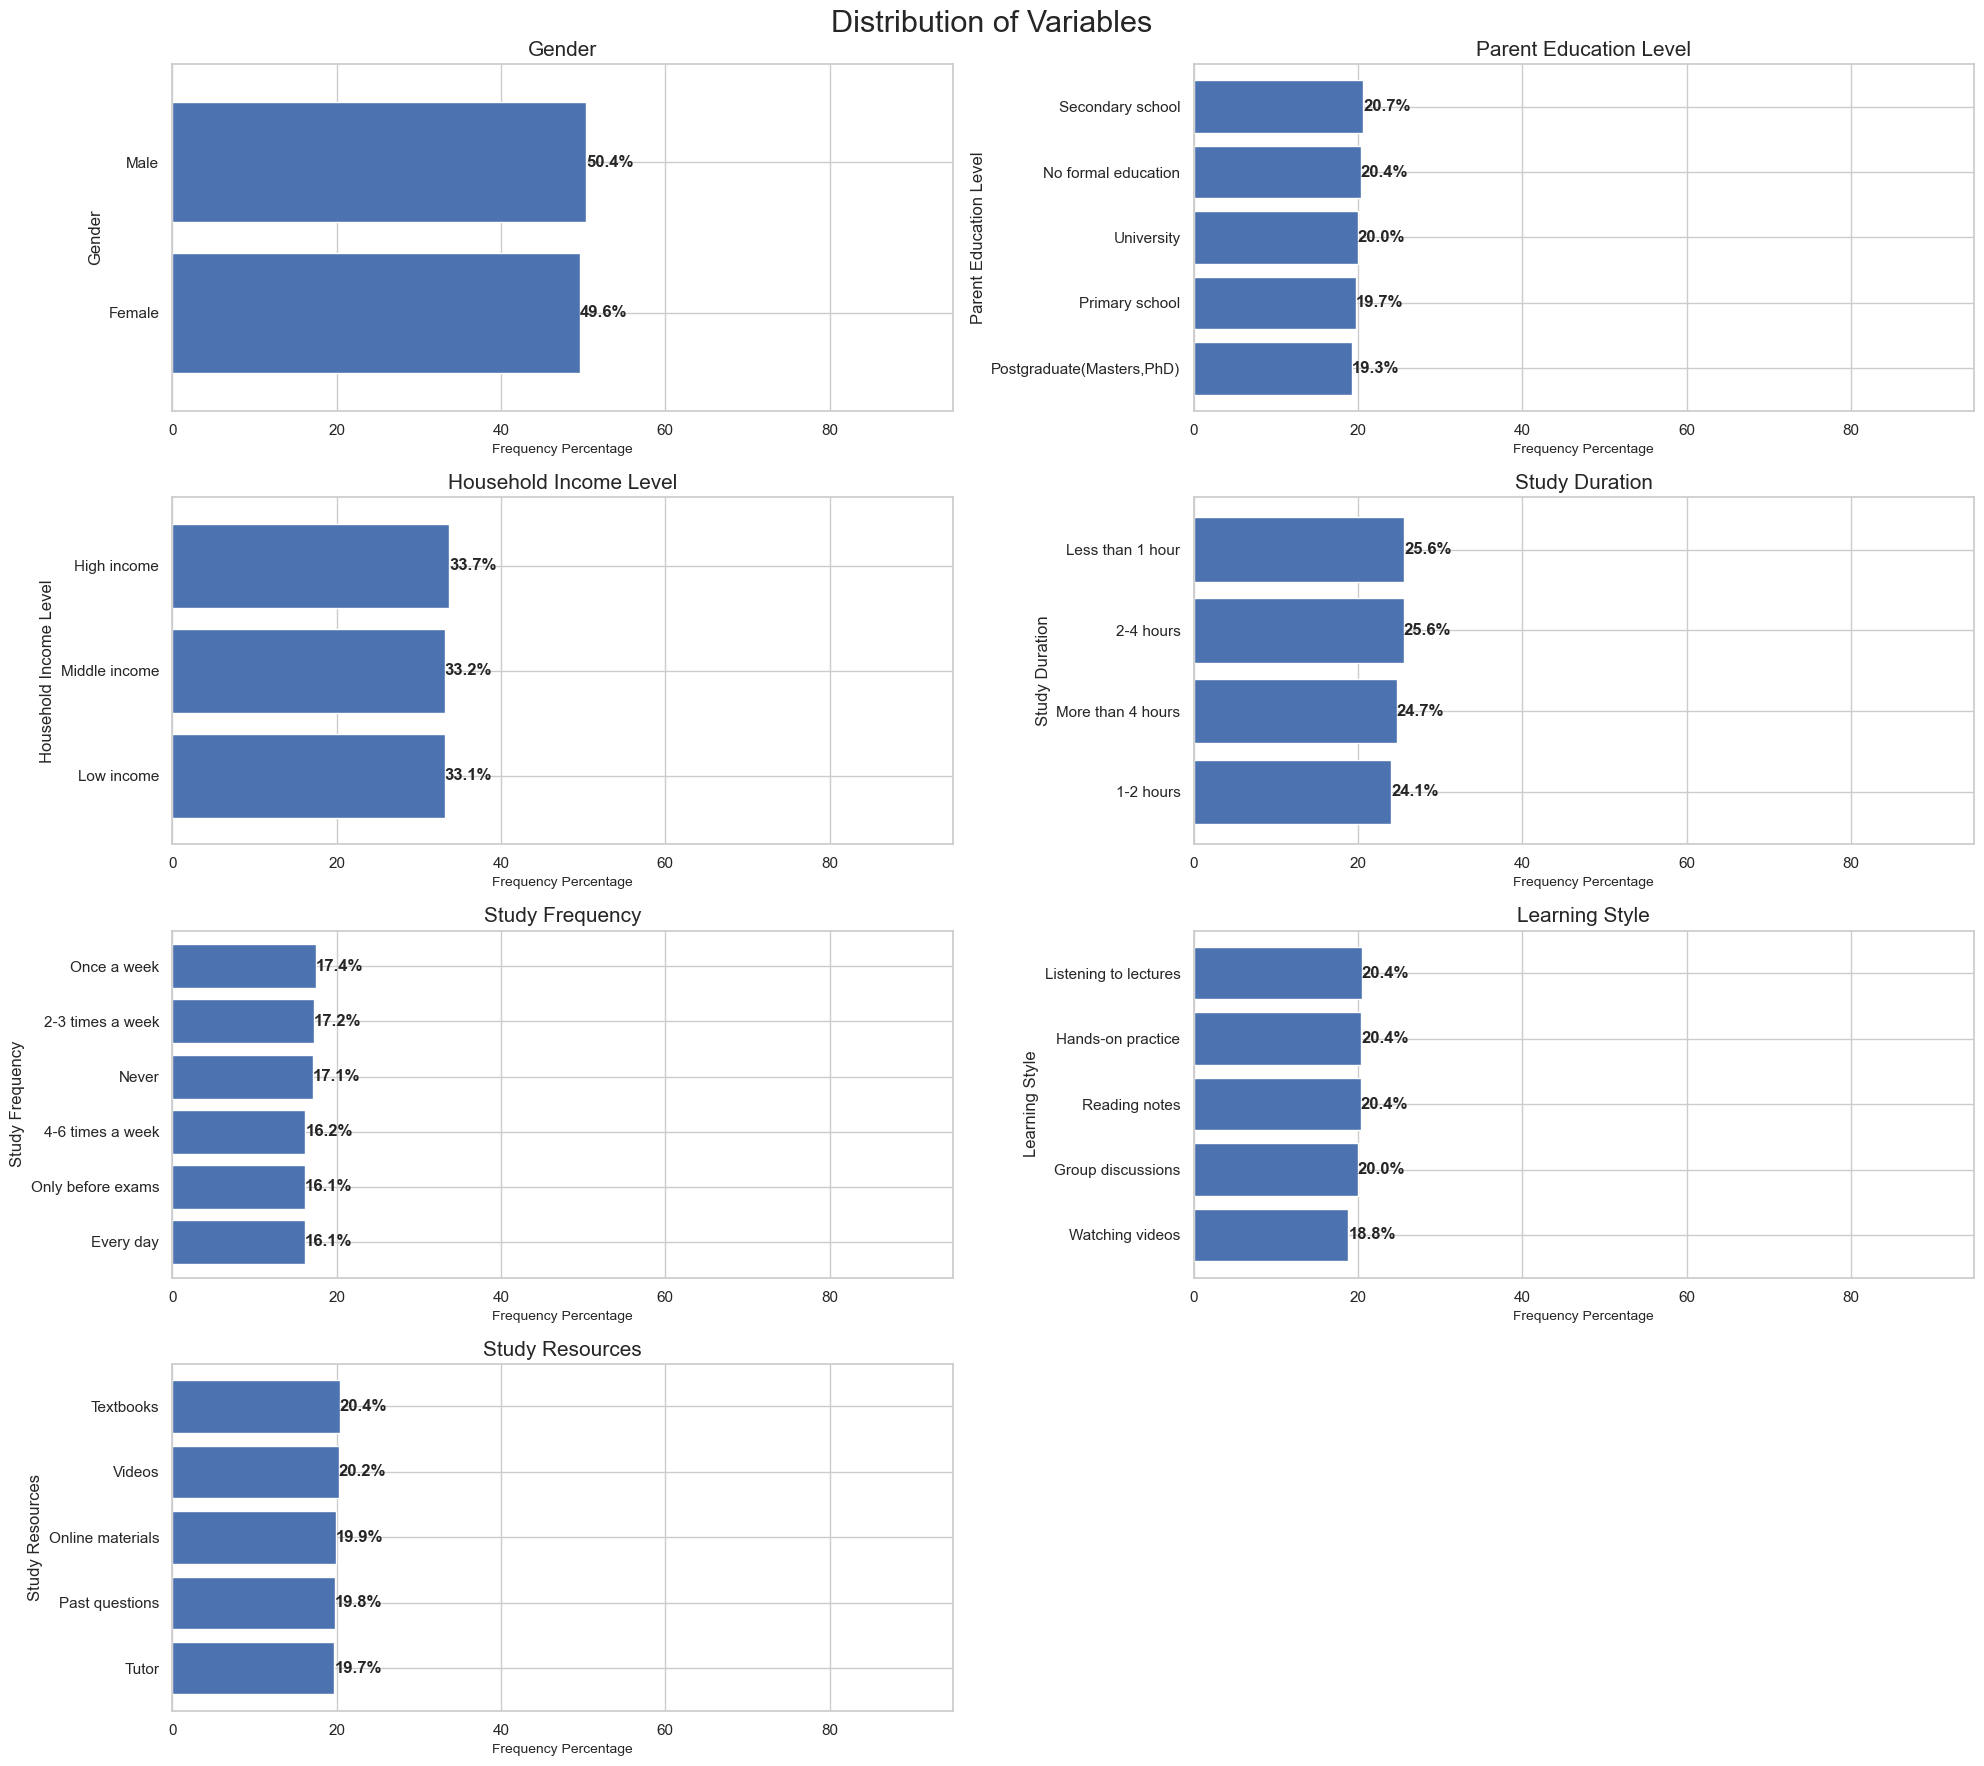

In [25]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(20, 18))

# Loop to plot bar charts for each categorical feature in the 4x4 layout
for i, col in enumerate(features_set1):
    row = i // 2  
    col_idx = i % 2
    
    # Calculate frequency percentages
    value_counts = data[col].value_counts(normalize=True).mul(100).sort_values()
    
    # Plot bar chart
    value_counts.plot(kind='barh', ax=ax[row, col_idx], width=0.8)
    
    # Add frequency percentages to the bars
    for index, value in enumerate(value_counts):
        ax[row, col_idx].text(value, index, str(round(value, 1)) + '%', fontsize=12, weight='bold', va='center')
    
    ax[row, col_idx].set_xlim([0, 95])
    ax[row, col_idx].set_xlabel('Frequency Percentage', fontsize=10)
    ax[row, col_idx].set_title(f'{col}', fontsize=15)


ax[3,1].axis('off')
plt.suptitle('Distribution of Variables', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


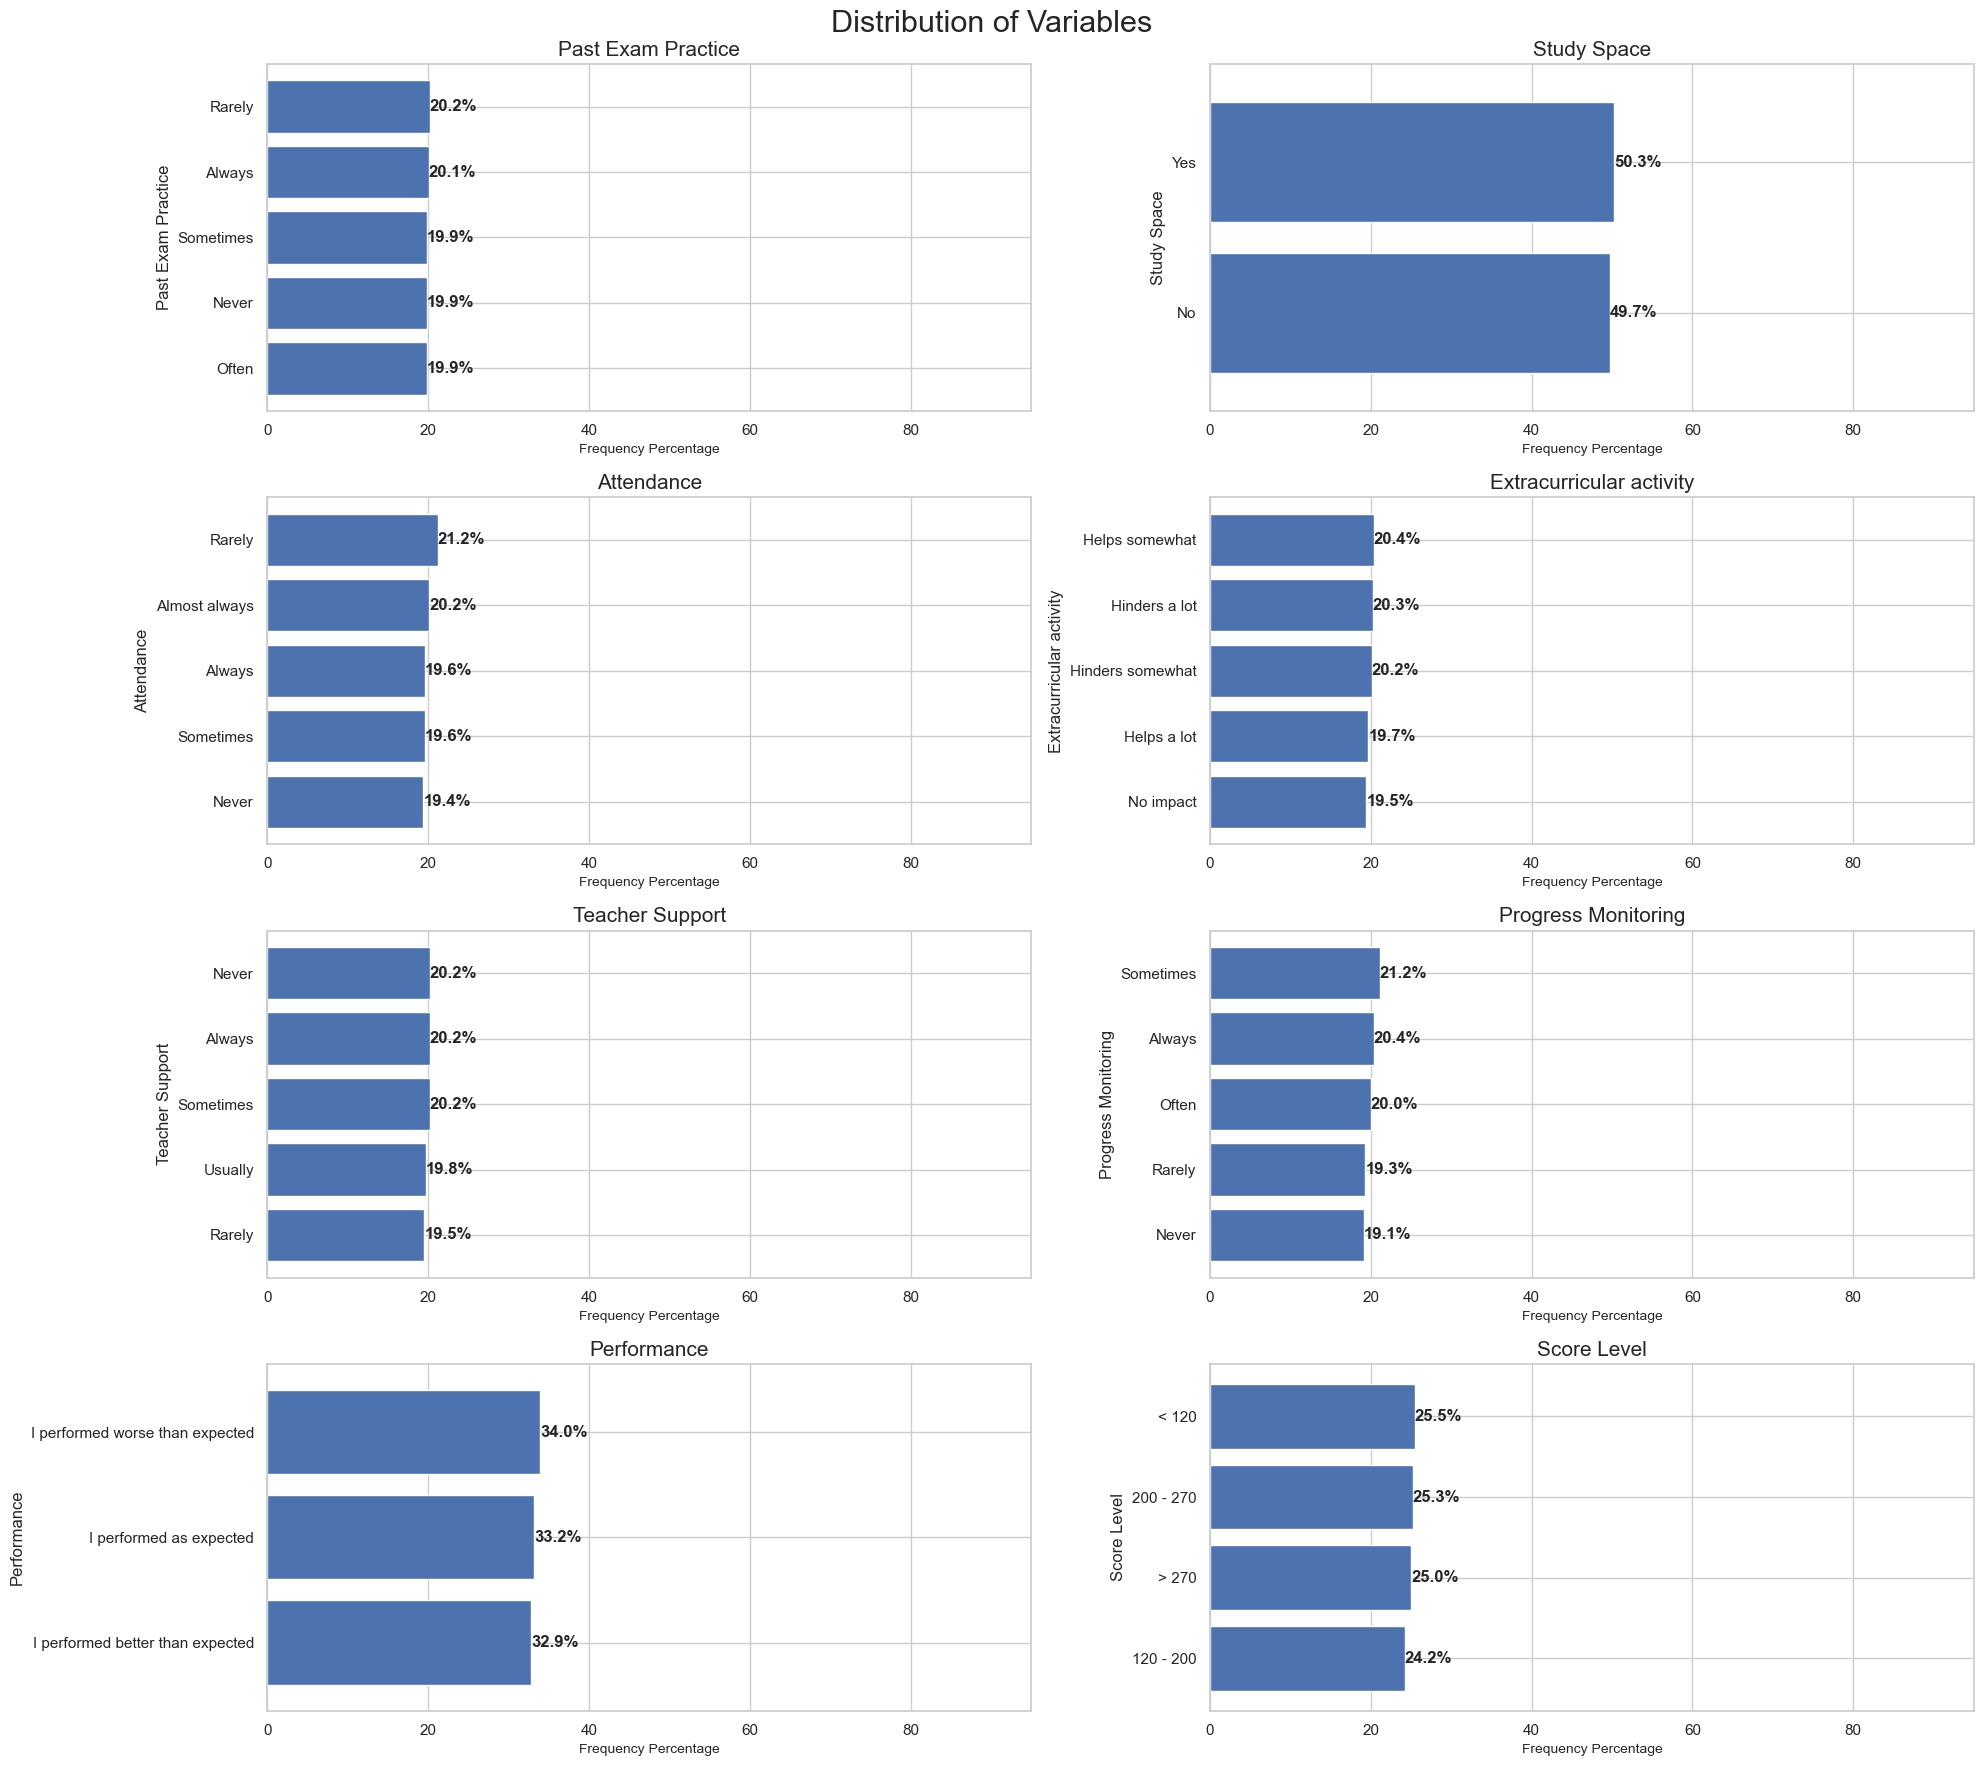

In [27]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(20, 18))

# Loop to plot bar charts for each categorical feature in the 4x4 layout
for i, col in enumerate(features_set2):
    row = i // 2  
    col_idx = i % 2
    
    # Calculate frequency percentages
    value_counts = data[col].value_counts(normalize=True).mul(100).sort_values()
    
    # Plot bar chart
    value_counts.plot(kind='barh', ax=ax[row, col_idx], width=0.8)
    
    # Add frequency percentages to the bars
    for index, value in enumerate(value_counts):
        ax[row, col_idx].text(value, index, str(round(value, 1)) + '%', fontsize=12, weight='bold', va='center')
    
    ax[row, col_idx].set_xlim([0, 95])
    ax[row, col_idx].set_xlabel('Frequency Percentage', fontsize=10)
    ax[row, col_idx].set_title(f'{col}', fontsize=15)



plt.suptitle('Distribution of Variables', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


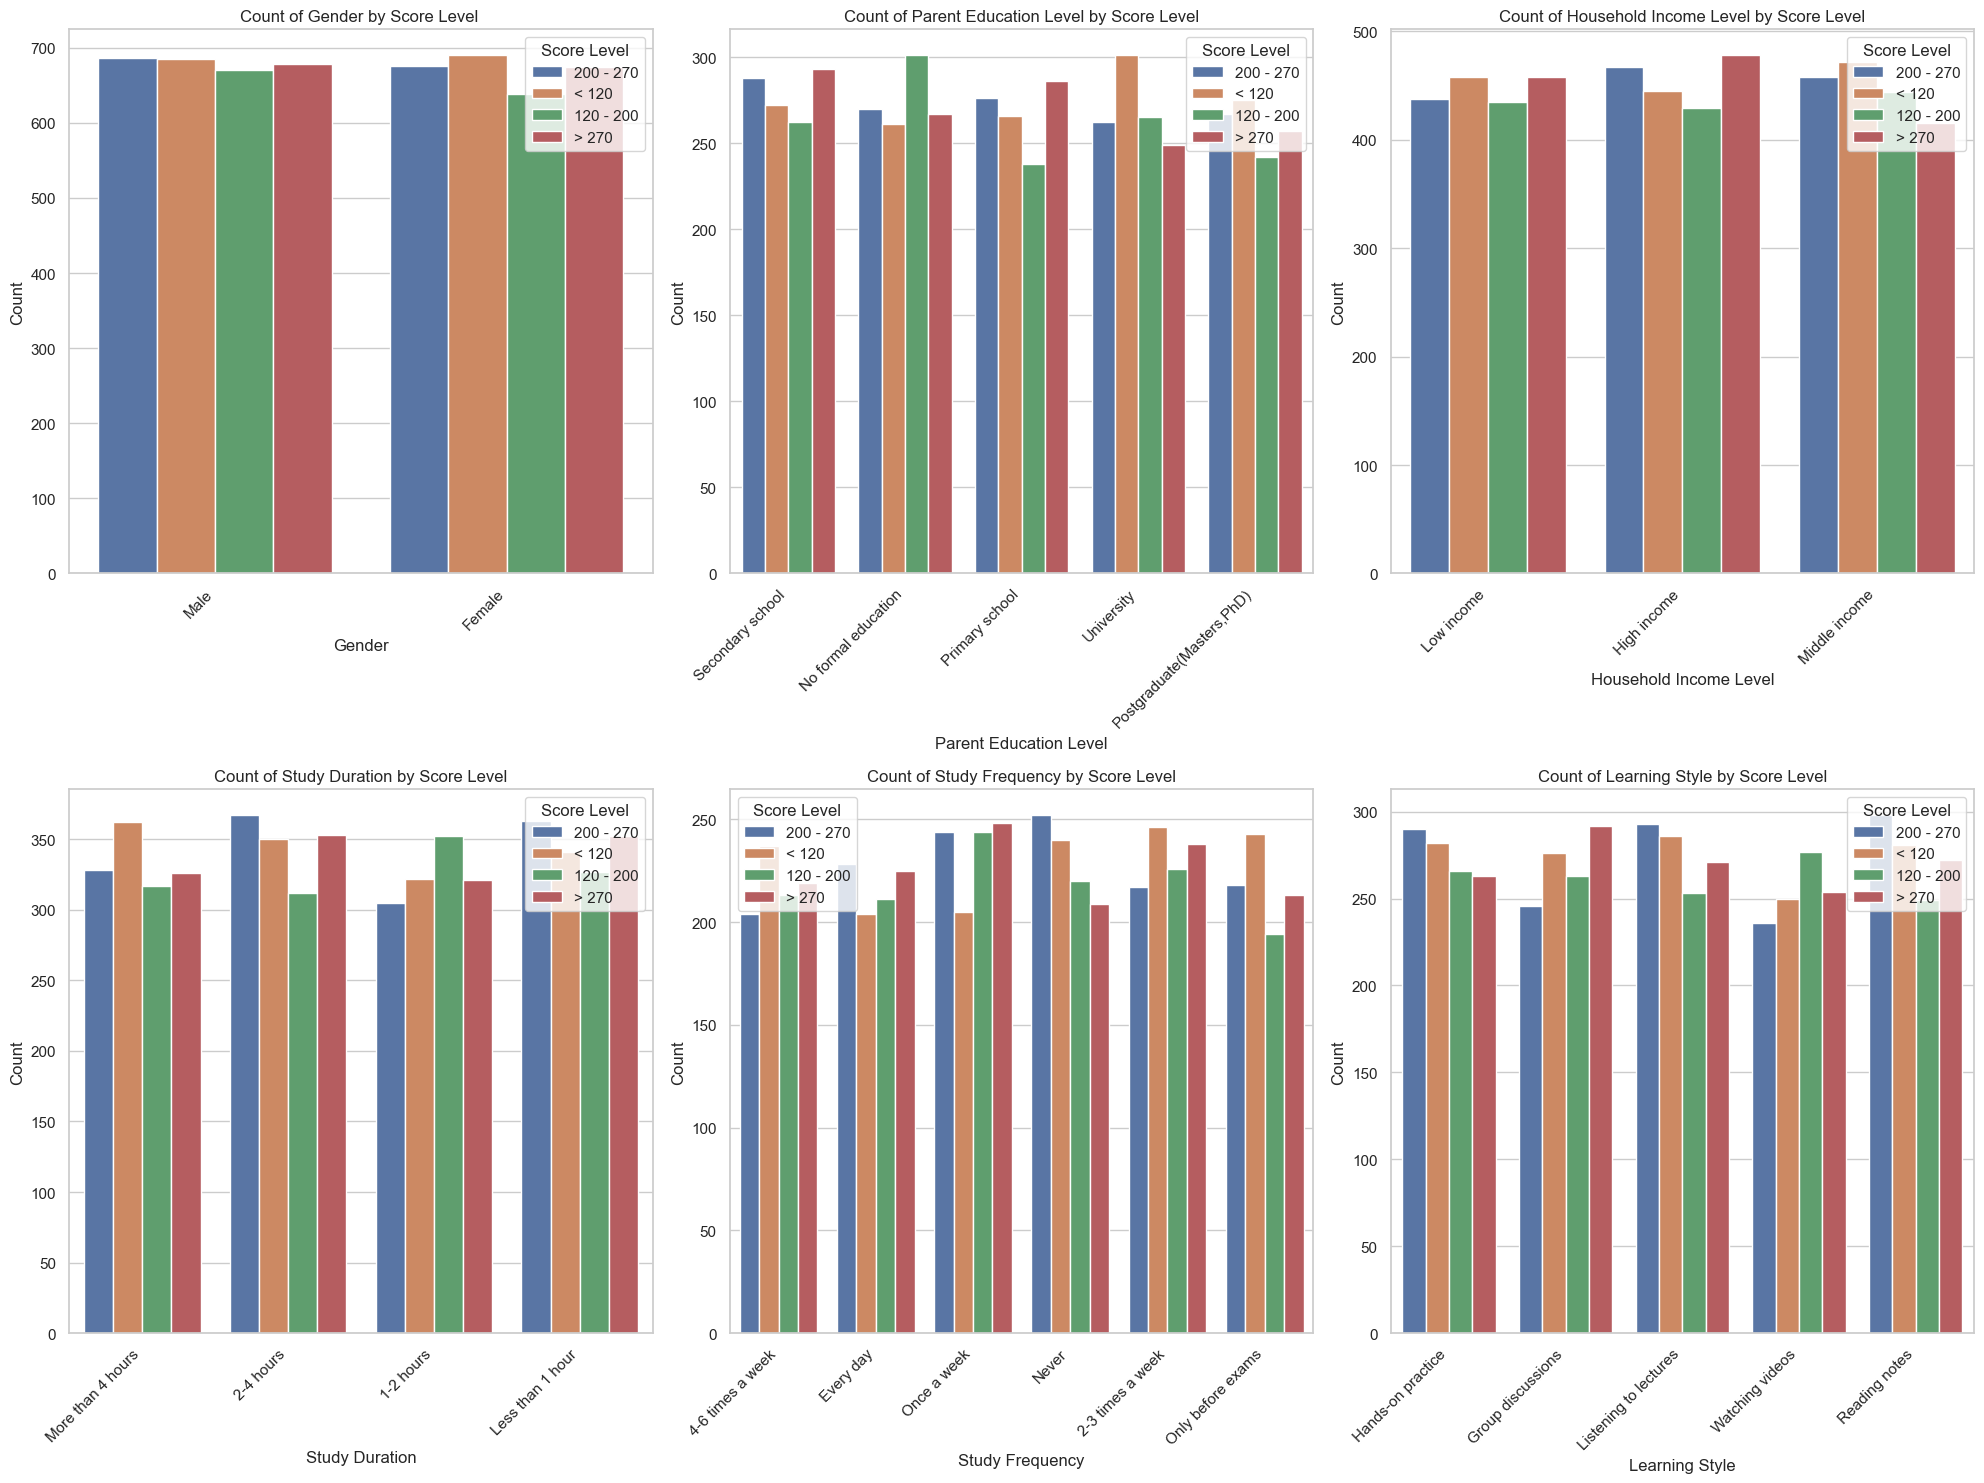

In [29]:
fig, axes = plt.subplots(2,3, figsize=(20,15))

sns.countplot(x=features_set1[0], hue='Score Level', data=data, ax=axes[0,0])
axes[0,0].set_xlabel('Gender')
axes[0,0].set_ylabel('Count')
axes[0,0].set_title('Count of Gender by Score Level ')
plt.setp(axes[0,0].get_xticklabels(), rotation=45, ha='right')
#axes[0,0].legend(loc='upper right', labels=['0','1'])

sns.countplot(x=features_set1[1], hue='Score Level', data=data, ax=axes[0,1])
axes[0,1].set_xlabel('Parent Education Level')
axes[0,1].set_ylabel('Count')
axes[0,1].set_title('Count of Parent Education Level by Score Level')
plt.setp(axes[0,1].get_xticklabels(), rotation=45, ha='right')
#axes[0,1].legend(loc='upper right', labels=['0','1'])

sns.countplot(x=features_set1[2], hue='Score Level', data=data, ax=axes[0,2])
axes[0,2].set_xlabel('Household Income Level')
axes[0,2].set_ylabel('Count')
axes[0,2].set_title('Count of Household Income Level by Score Level')
plt.setp(axes[0,2].get_xticklabels(), rotation=45, ha='right')
#axes[0,2].legend(loc='upper right', labels=['0','1'])

sns.countplot(x=features_set1[3], hue='Score Level', data=data, ax=axes[1,0])
axes[1,0].set_xlabel('Study Duration')
axes[1,0].set_ylabel('Count')
axes[1,0].set_title('Count of Study Duration by Score Level')
plt.setp(axes[1,0].get_xticklabels(), rotation=45, ha='right')
#axes[1,0].legend(loc='upper right', labels=['0','1'])


sns.countplot(x=features_set1[4], hue='Score Level', data=data, ax=axes[1,1])
axes[1,1].set_xlabel('Study Frequency')
axes[1,1].set_ylabel('Count')
axes[1,1].set_title('Count of Study Frequency by Score Level')
plt.setp(axes[1,1].get_xticklabels(), rotation=45, ha='right')
#axes[1,1].legend(loc='upper right', labels=['0','1'])

sns.countplot(x=features_set1[5], hue='Score Level', data=data, ax=axes[1,2])
axes[1,2].set_xlabel('Learning Style')
axes[1,2].set_ylabel('Count')
axes[1,2].set_title('Count of Learning Style by Score Level')
plt.setp(axes[1,2].get_xticklabels(), rotation=45, ha='right')
#axes[1,2].legend(loc='upper right', labels=['0','1'])


plt.tight_layout()

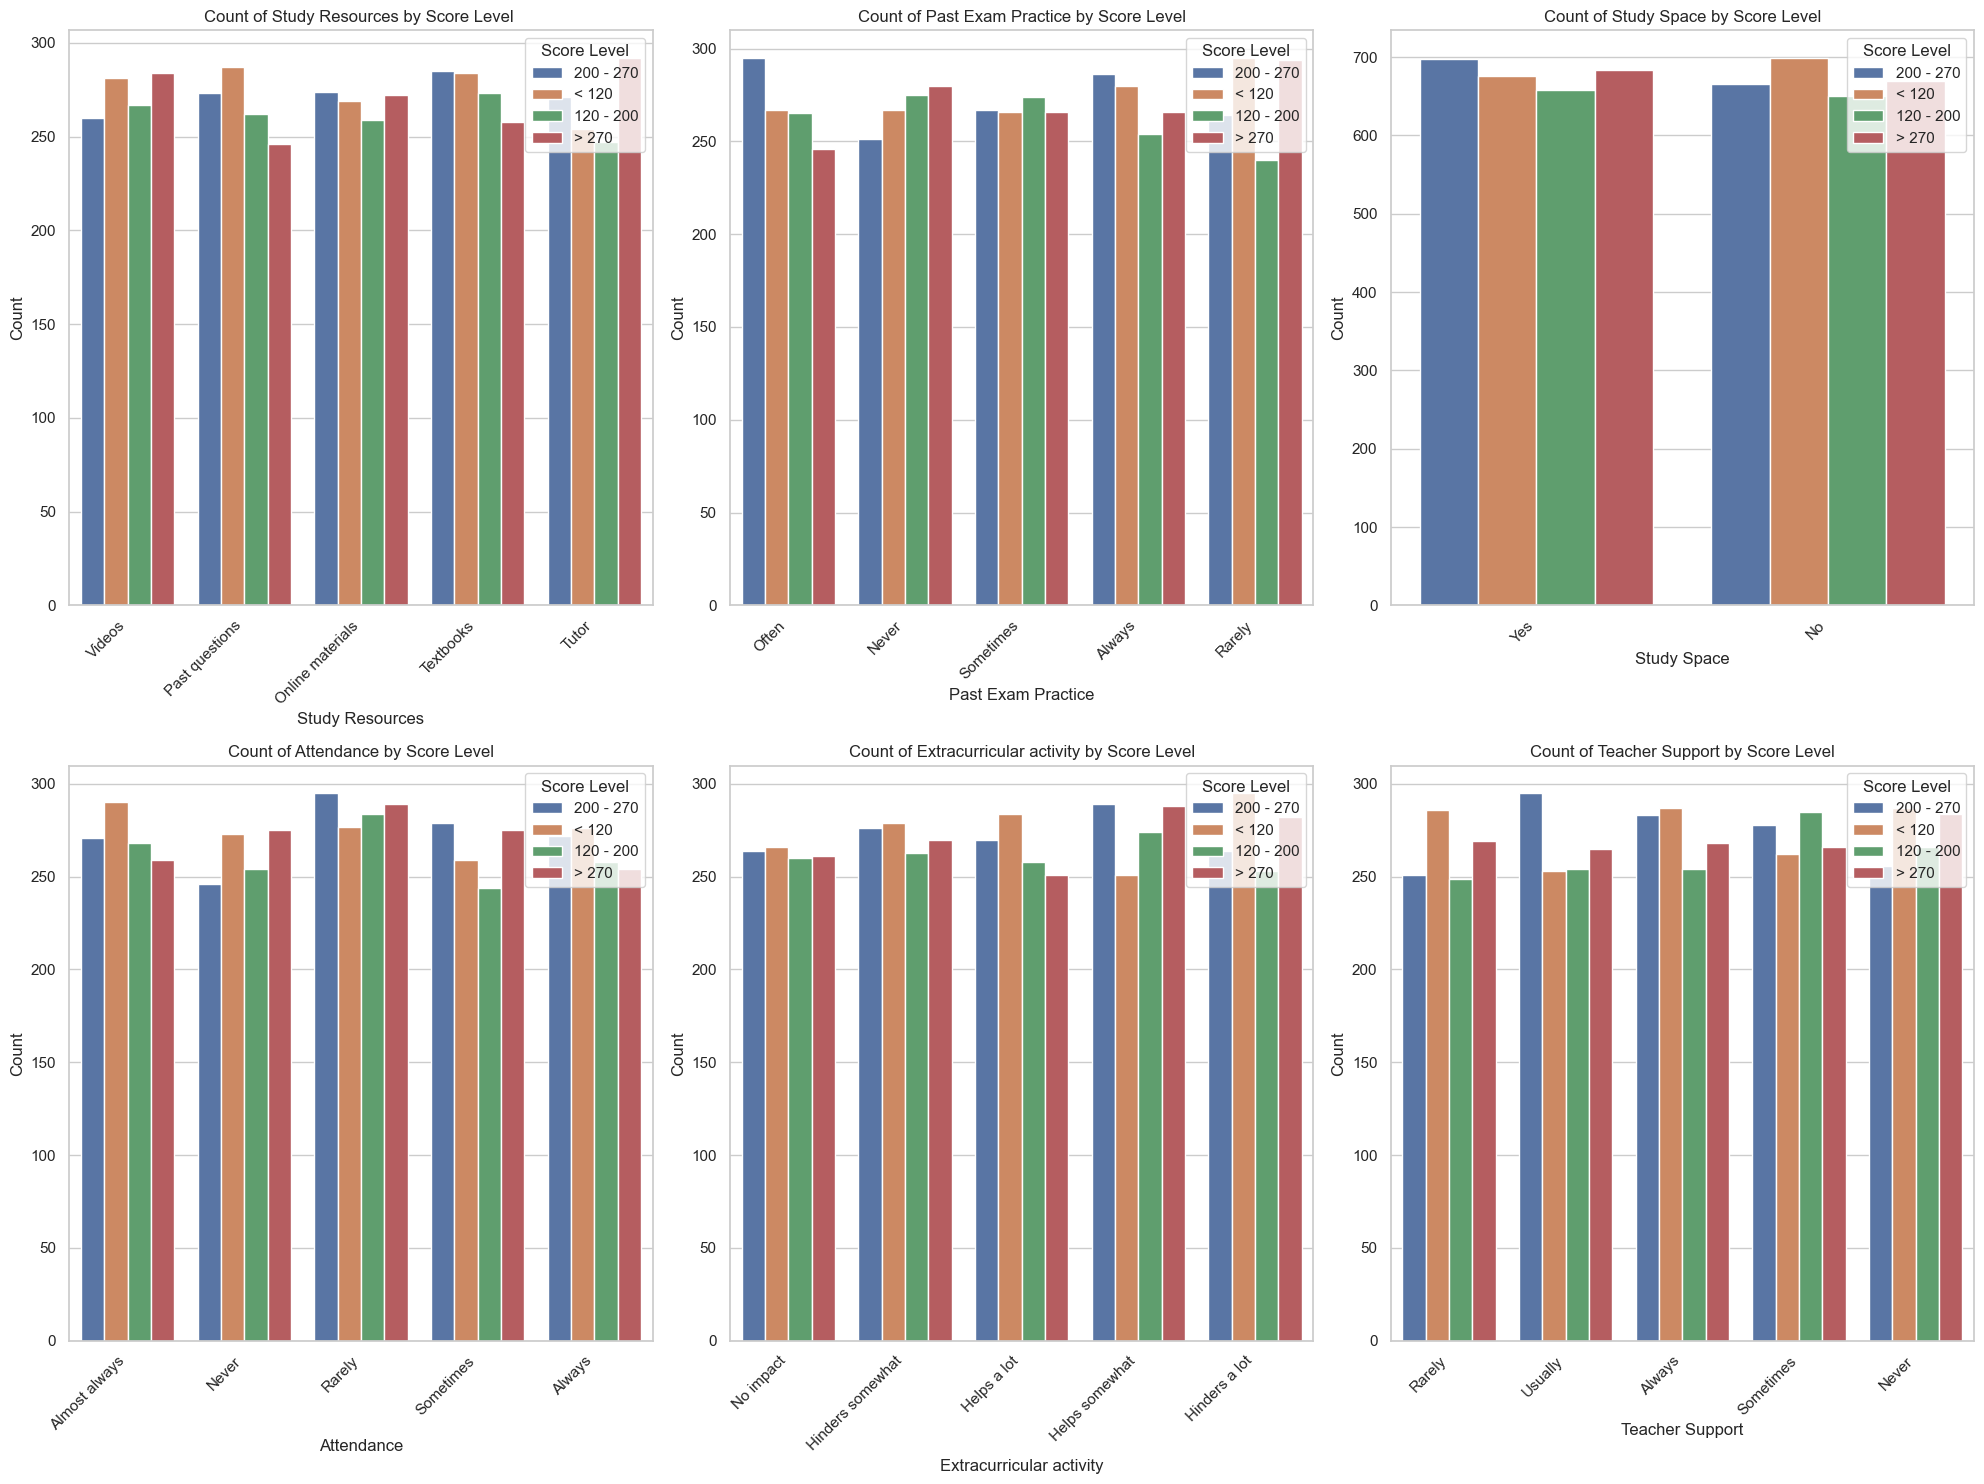

In [31]:
fig, axes = plt.subplots(2,3, figsize=(20,15))

sns.countplot(x=features_set1[6], hue='Score Level', data=data, ax=axes[0,0])
axes[0,0].set_xlabel('Study Resources')
axes[0,0].set_ylabel('Count')
axes[0,0].set_title('Count of Study Resources by Score Level ')
plt.setp(axes[0,0].get_xticklabels(), rotation=45, ha='right')
#axes[0,0].legend(loc='upper right', labels=['0','1'])

sns.countplot(x=features_set2[0], hue='Score Level', data=data, ax=axes[0,1])
axes[0,1].set_xlabel('Past Exam Practice')
axes[0,1].set_ylabel('Count')
axes[0,1].set_title('Count of Past Exam Practice by Score Level')
plt.setp(axes[0,1].get_xticklabels(), rotation=45, ha='right')
#axes[0,1].legend(loc='upper right', labels=['0','1'])

sns.countplot(x=features_set2[1], hue='Score Level', data=data, ax=axes[0,2])
axes[0,2].set_xlabel('Study Space')
axes[0,2].set_ylabel('Count')
axes[0,2].set_title('Count of Study Space by Score Level')
plt.setp(axes[0,2].get_xticklabels(), rotation=45, ha='right')
#axes[0,2].legend(loc='upper right', labels=['0','1'])

sns.countplot(x=features_set2[2], hue='Score Level', data=data, ax=axes[1,0])
axes[1,0].set_xlabel('Attendance')
axes[1,0].set_ylabel('Count')
axes[1,0].set_title('Count of Attendance by Score Level')
plt.setp(axes[1,0].get_xticklabels(), rotation=45, ha='right')
#axes[1,0].legend(loc='upper right', labels=['0','1'])


sns.countplot(x=features_set2[3], hue='Score Level', data=data, ax=axes[1,1])
axes[1,1].set_xlabel('Extracurricular activity')
axes[1,1].set_ylabel('Count')
axes[1,1].set_title('Count of Extracurricular activity by Score Level')
plt.setp(axes[1,1].get_xticklabels(), rotation=45, ha='right')
#axes[1,1].legend(loc='upper right', labels=['0','1'])

sns.countplot(x=features_set2[4], hue='Score Level', data=data, ax=axes[1,2])
axes[1,2].set_xlabel('Teacher Support')
axes[1,2].set_ylabel('Count')
axes[1,2].set_title('Count of Teacher Support by Score Level')
plt.setp(axes[1,2].get_xticklabels(), rotation=45, ha='right')
#axes[1,2].legend(loc='upper right', labels=['0','1'])


plt.tight_layout()

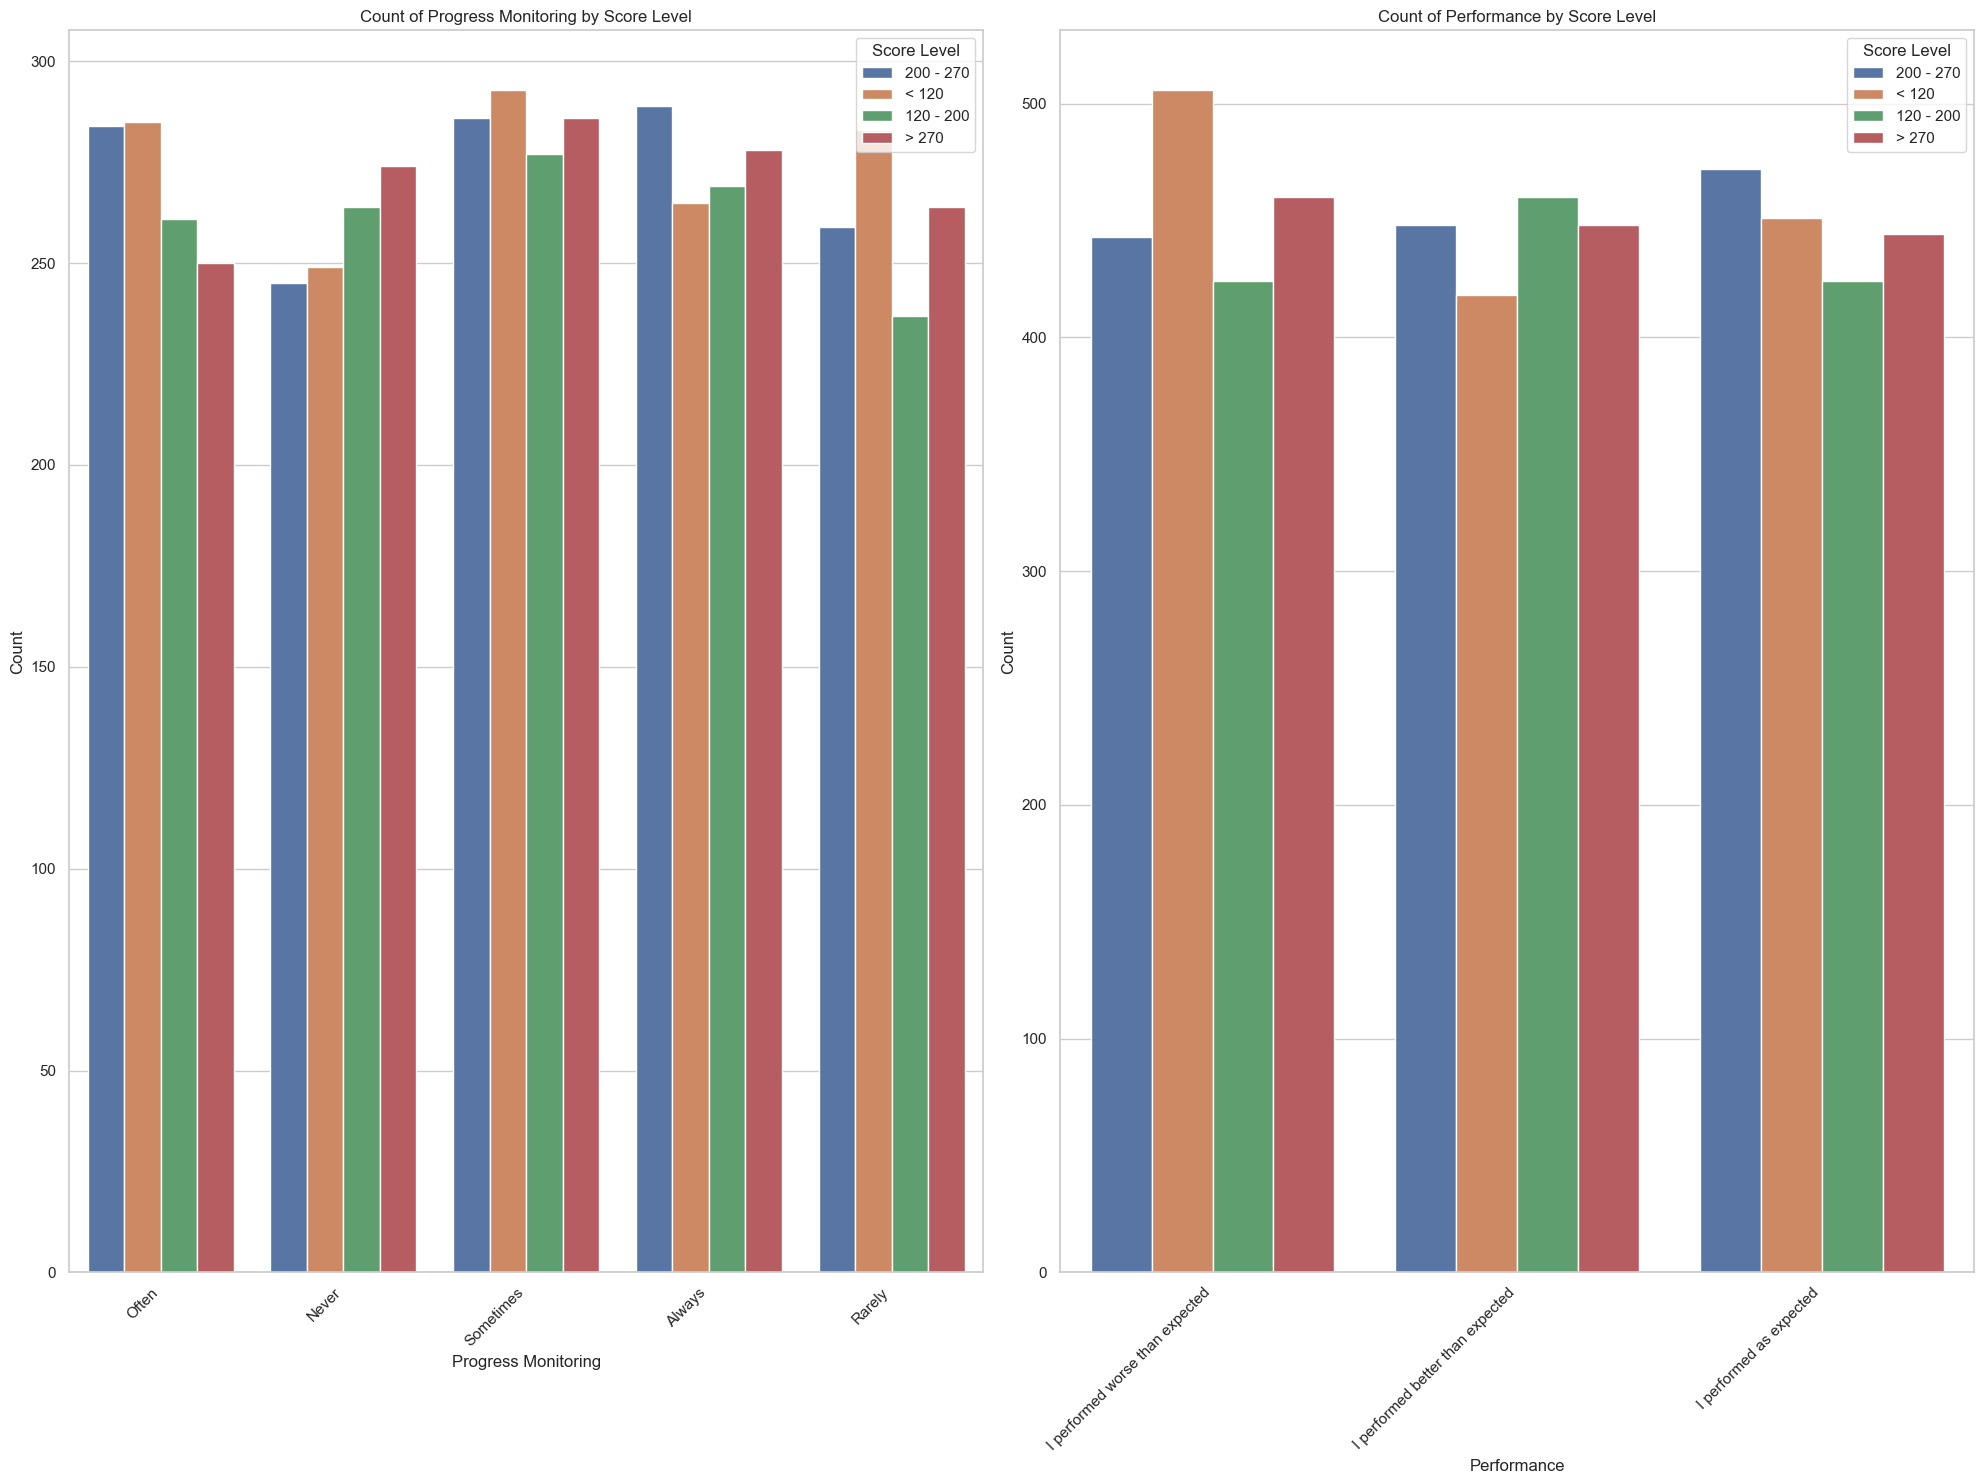

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(20, 15))

sns.countplot(x=features_set2[5], hue='Score Level', data=data, ax=axes[0])
axes[0].set_xlabel('Progress Monitoring')
axes[0].set_ylabel('Count')
axes[0].set_title('Count of Progress Monitoring by Score Level')
plt.setp(axes[0].get_xticklabels(), rotation=45, ha='right')

sns.countplot(x=features_set2[6], hue='Score Level', data=data, ax=axes[1])
axes[1].set_xlabel('Performance')
axes[1].set_ylabel('Count')
axes[1].set_title('Count of Performance by Score Level')
plt.setp(axes[1].get_xticklabels(), rotation=45, ha='right')


plt.tight_layout()

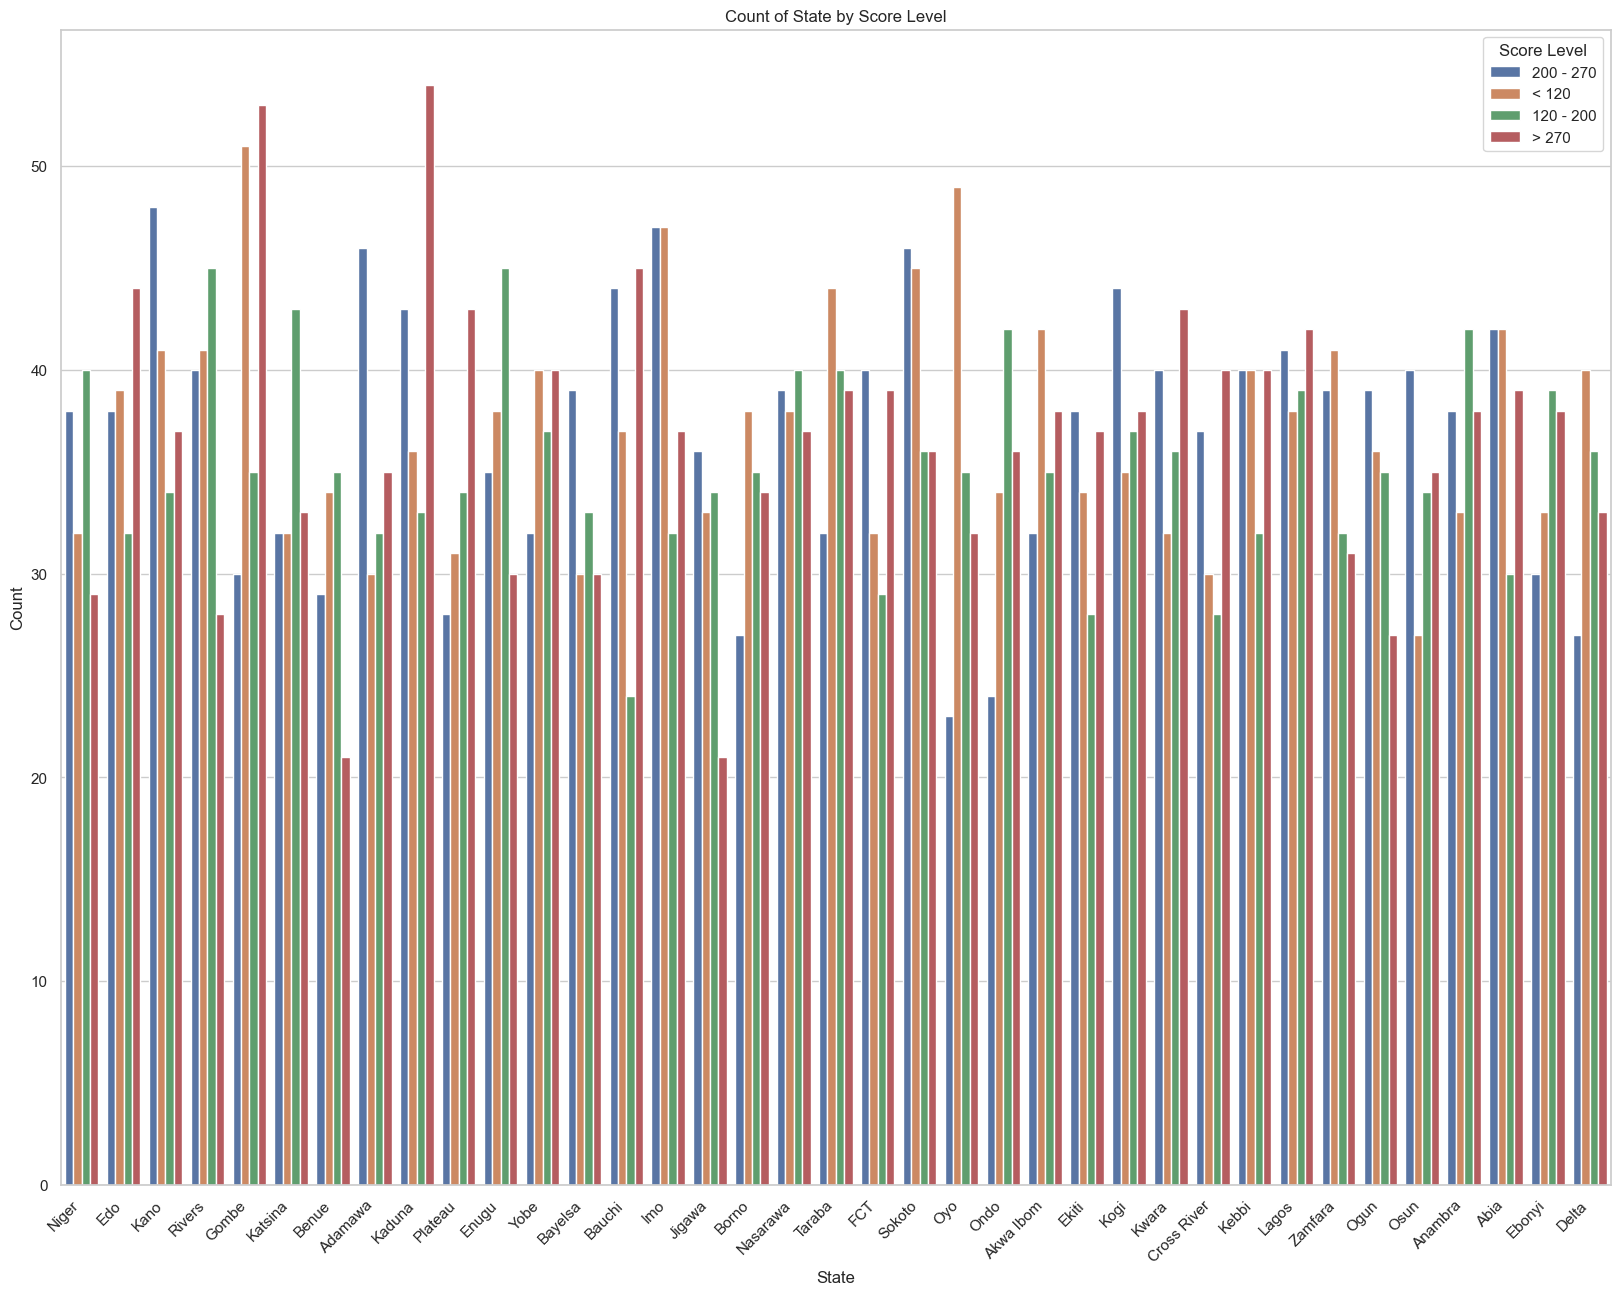

In [35]:
plt.figure(figsize=(20, 15))

sns.countplot(x='State', hue='Score Level', data=data)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Count of State by Score Level')
plt.xticks(rotation=45, ha='right')

plt.show()

In [93]:
def assign_target(score):
    if score == '< 120':
        return 'Fail'
    elif score == '120 - 200':
        return 'Fail'
    elif score == '200 - 270':
        return 'Pass'
    elif score == '> 270':
        return 'Pass'
    else:
        return 'Unknown' 

# Create a new column 'target' based on the 'Score Level' column
data['Grade'] = data['Score Level'].apply(assign_target)

data.head(2)

,Timestamp,ID,Gender,State,Parent Education Level,Household Income Level,Study Duration,Study Frequency,Learning Style,Study Resources,Past Exam Practice,Study Space,Attendance,Extracurricular activity,Teacher Support,Progress Monitoring,Performance,Score Level,Grade
0,2024-06-15 14:21:35,1,Male,Niger,Secondary school,Low income,More than 4 hours,4-6 times a week,Hands-on practice,Videos,Often,Yes,Almost always,No impact,Rarely,Often,I performed worse than expected,200 - 270,Pass
1,2024-03-29 09:58:23,2,Female,Edo,No formal education,High income,More than 4 hours,4-6 times a week,Group discussions,Videos,Often,Yes,Never,Hinders somewhat,Usually,Never,I performed better than expected,< 120,Fail


In [67]:
data['Attendance'].unique()

array(['Almost always', 'Never', 'Rarely', 'Sometimes', 'Always'],
      dtype=object)

In [59]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [95]:
# Define features to label encode
feature_to_label_encode = ['State', 'Gender', 'Grade', 'Study Frequency','Learning Style','Study Resources',
                           'Past Exam Practice','Extracurricular activity','Teacher Support','Progress Monitoring']

for feature in feature_to_label_encode:
    data[feature] = label_encoder.fit_transform(data[feature])


In [97]:
data.head(2)

,Timestamp,ID,Gender,State,Parent Education Level,Household Income Level,Study Duration,Study Frequency,Learning Style,Study Resources,Past Exam Practice,Study Space,Attendance,Extracurricular activity,Teacher Support,Progress Monitoring,Performance,Score Level,Grade
0,2024-06-15 14:21:35,1,1,26,Secondary school,Low income,More than 4 hours,1,1,4,2,Yes,Almost always,4,2,2,I performed worse than expected,200 - 270,1
1,2024-03-29 09:58:23,2,0,11,No formal education,High income,More than 4 hours,1,0,4,2,Yes,Never,3,4,1,I performed better than expected,< 120,0


In [99]:
ordinal_encoder = OrdinalEncoder()

feature_to_ordinal_encoder = ['Parent Education Level', 'Household Income Level', 'Study Duration','Attendance']

for feature in feature_to_ordinal_encoder:
    # Reshape the column to 2D before applying OrdinalEncoder
    data[feature] = ordinal_encoder.fit_transform(data[[feature]])


In [101]:
data.head()

,Timestamp,ID,Gender,State,Parent Education Level,Household Income Level,Study Duration,Study Frequency,Learning Style,Study Resources,Past Exam Practice,Study Space,Attendance,Extracurricular activity,Teacher Support,Progress Monitoring,Performance,Score Level,Grade
0,2024-06-15 14:21:35,1,1,26,3.0,1.0,3.0,1,1,4,2,Yes,0.0,4,2,2,I performed worse than expected,200 - 270,1
1,2024-03-29 09:58:23,2,0,11,0.0,0.0,3.0,1,0,4,2,Yes,2.0,3,4,1,I performed better than expected,< 120,0
2,2024-04-07 22:24:46,3,1,19,0.0,1.0,1.0,2,2,1,1,Yes,0.0,4,2,4,I performed worse than expected,120 - 200,0
3,2024-03-30 21:55:56,4,0,32,0.0,2.0,3.0,4,2,4,1,No,3.0,4,0,0,I performed better than expected,> 270,1
4,2024-09-10 04:52:05,5,1,15,3.0,1.0,1.0,1,4,0,1,No,4.0,4,3,3,I performed worse than expected,120 - 200,0


In [157]:
train_size = 0.8 
split_index = int(train_size * len(data))

train_data = data[:split_index]
test_data = data[split_index:]

In [117]:
train_data.shape

(4318, 19)

In [119]:
y = train_data['Grade']
train_data = train_data.drop(['Timestamp','ID','Performance','Grade', 'Score Level'],axis=1)
train_data.head()

,Gender,State,Parent Education Level,Household Income Level,Study Duration,Study Frequency,Learning Style,Study Resources,Past Exam Practice,Study Space,Attendance,Extracurricular activity,Teacher Support,Progress Monitoring
0,1,26,3.0,1.0,3.0,1,1,4,2,Yes,0.0,4,2,2
1,0,11,0.0,0.0,3.0,1,0,4,2,Yes,2.0,3,4,1
2,1,19,0.0,1.0,1.0,2,2,1,1,Yes,0.0,4,2,4
3,0,32,0.0,2.0,3.0,4,2,4,1,No,3.0,4,0,0
4,1,15,3.0,1.0,1.0,1,4,0,1,No,4.0,4,3,3


In [121]:
features_to_one_hot_encode = ['Study Space']

# One-hot encode the selected feature
train_encoded = pd.get_dummies(train_data, columns=features_to_one_hot_encode,dtype=int)

In [159]:
# One-hot encode the selected features
test_encoded = pd.get_dummies(test_data, columns=features_to_one_hot_encode,dtype=int)

In [125]:
Train = train_encoded
Train.head()

,Gender,State,Parent Education Level,Household Income Level,Study Duration,Study Frequency,Learning Style,Study Resources,Past Exam Practice,Attendance,Extracurricular activity,Teacher Support,Progress Monitoring,Study Space_No,Study Space_Yes
0,1,26,3.0,1.0,3.0,1,1,4,2,0.0,4,2,2,0,1
1,0,11,0.0,0.0,3.0,1,0,4,2,2.0,3,4,1,0,1
2,1,19,0.0,1.0,1.0,2,2,1,1,0.0,4,2,4,0,1
3,0,32,0.0,2.0,3.0,4,2,4,1,3.0,4,0,0,1,0
4,1,15,3.0,1.0,1.0,1,4,0,1,4.0,4,3,3,1,0


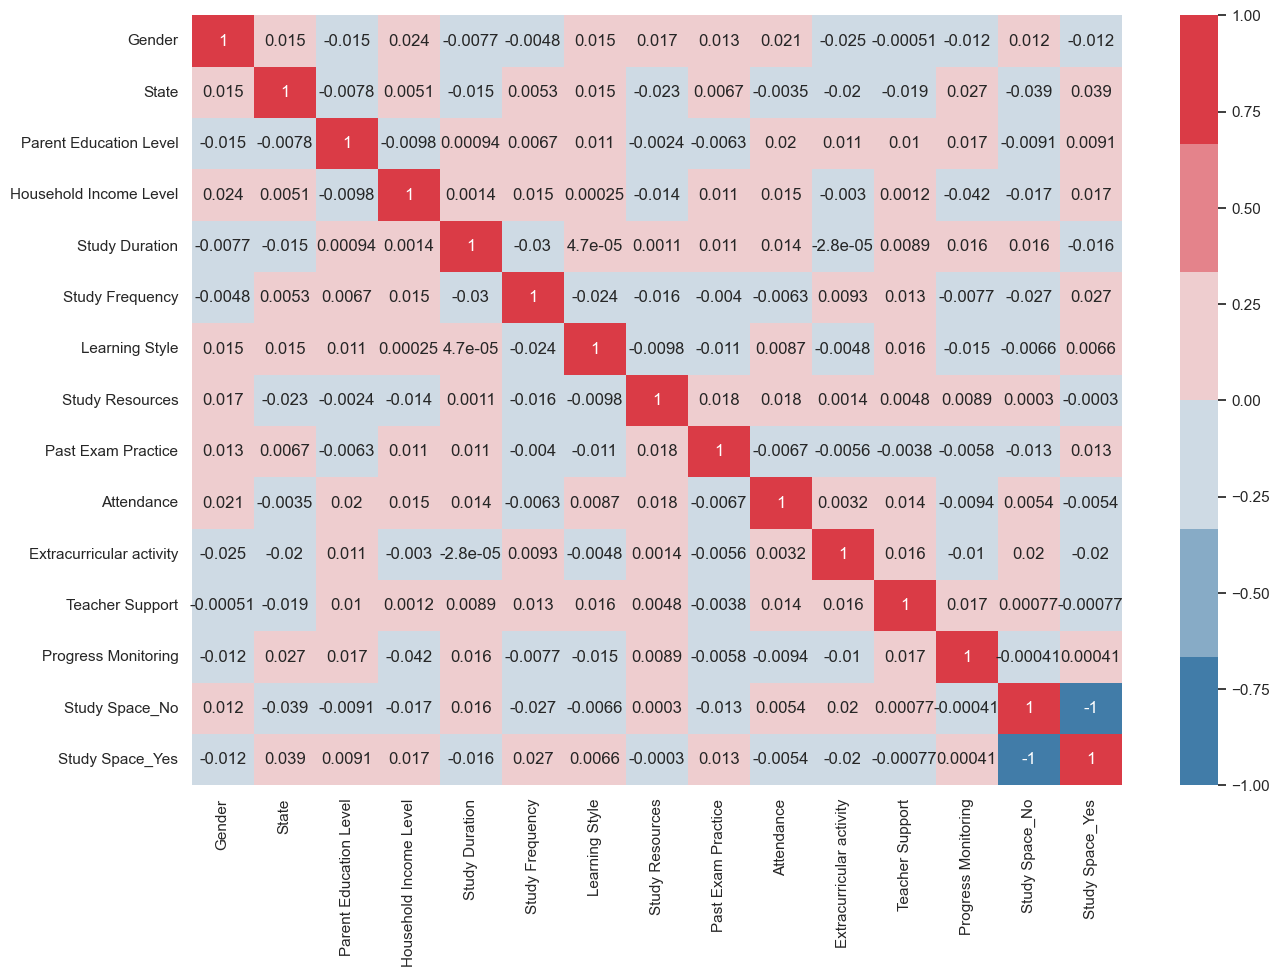

In [127]:
plt.figure(figsize=(15,10))
sns.heatmap(data = Train.corr(),annot=True, cbar=True,cmap=sns.diverging_palette(240,10))
plt.show()

In [129]:
y.value_counts()

Grade
0    2161
1    2157
Name: count, dtype: int64

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
import xgboost as xgb

In [133]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store metrics
accuracies = {'SVC': [], 'KNN': [], 'CatBoost': [], 'LightGBM': [],'Xgboost': [], 'RandomForest': [], 'LogisticRegression': []}
precisions = {'SVC': [], 'KNN': [], 'CatBoost': [], 'LightGBM': [],'Xgboost': [], 'RandomForest': [], 'LogisticRegression': []}
recalls = {'SVC': [], 'KNN': [], 'CatBoost': [], 'LightGBM': [],'Xgboost': [], 'RandomForest': [], 'LogisticRegression': []}
f1_scores = {'SVC': [], 'KNN': [], 'CatBoost': [], 'LightGBM': [],'Xgboost': [], 'RandomForest': [], 'LogisticRegression': []}

# Define models
models = {
    'SVC': SVC(random_state=5),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'CatBoost': CatBoostClassifier(random_state=5,verbose=0),
    'Xgboost': xgb.XGBClassifier(random_state=5),
    'RandomForest': RandomForestClassifier(random_state=5),
    'LogisticRegression': LogisticRegression(random_state=5)
}

# Stratified K-Fold Cross-Validation for each model
for model_name, model in models.items():
    for train_index, val_index in skf.split(Train, y):
        X_train, X_val = Train.iloc[train_index], Train.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Fit the model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)

        accuracies[model_name].append(accuracy_score(y_val, y_pred))
        precisions[model_name].append(precision_score(y_val, y_pred, average='weighted'))
        recalls[model_name].append(recall_score(y_val, y_pred, average='weighted'))
        f1_scores[model_name].append(f1_score(y_val, y_pred, average='weighted'))

# Print the average of each metric over all the folds for each model
for model_name in models.keys():
    print(f"Results for {model_name}:")
    print(f'Average Accuracy: {np.mean(accuracies[model_name]):.4f}')
    print(f'Average Precision: {np.mean(precisions[model_name]):.4f}')
    print(f'Average Recall: {np.mean(recalls[model_name]):.4f}')
    print(f'Average F1 Score: {np.mean(f1_scores[model_name]):.4f}')
    print('===================================================================================================',end='\n\n')

Results for SVC:
Average Accuracy: 0.5074
Average Precision: 0.5076
Average Recall: 0.5074
Average F1 Score: 0.5061

Results for KNN:
Average Accuracy: 0.4972
Average Precision: 0.4972
Average Recall: 0.4972
Average F1 Score: 0.4971

Results for CatBoost:
Average Accuracy: 0.4954
Average Precision: 0.4954
Average Recall: 0.4954
Average F1 Score: 0.4953

Results for Xgboost:
Average Accuracy: 0.5023
Average Precision: 0.5023
Average Recall: 0.5023
Average F1 Score: 0.5022

Results for RandomForest:
Average Accuracy: 0.5025
Average Precision: 0.5025
Average Recall: 0.5025
Average F1 Score: 0.5021

Results for LogisticRegression:
Average Accuracy: 0.5007
Average Precision: 0.5007
Average Recall: 0.5007
Average F1 Score: 0.5003



In [151]:
train_X, val_X, train_y, val_y = train_test_split(Train, y, test_size=0.2, random_state=13)

# Initialize the SVC model
svc = SVC(random_state=5)

# Fit the model
svc.fit(X_train, y_train)

svc_pred = svc.predict(X_val)

# Evaluate the model
print(f"Validation Accuracy: {accuracy_score(y_val, svc_pred):.4f}")

Validation Accuracy: 0.5156


In [143]:
student_id = pd.DataFrame(test_data['ID'])
student_id.columns = ['ID']
student_id.head()

,ID
4318,4319
4319,4320
4320,4321
4321,4322
4322,4323


In [141]:
test_encoded.head()

,Timestamp,ID,Gender,State,Parent Education Level,Household Income Level,Study Duration,Study Frequency,Learning Style,Study Resources,Past Exam Practice,Attendance,Extracurricular activity,Teacher Support,Progress Monitoring,Performance,Score Level,Grade,Study Space_No,Study Space_Yes
4318,2024-05-18 01:45:45,4319,1,7,2.0,1.0,1.0,1,1,4,4,2.0,2,3,0,I performed as expected,120 - 200,0,0,1
4319,2024-07-09 09:43:09,4320,0,17,0.0,2.0,0.0,2,2,0,0,4.0,0,0,2,I performed worse than expected,< 120,0,1,0
4320,2024-03-07 14:23:07,4321,1,11,4.0,0.0,1.0,5,1,0,3,0.0,0,4,4,I performed as expected,> 270,1,0,1
4321,2024-05-24 21:22:52,4322,1,30,2.0,2.0,1.0,0,3,4,1,0.0,4,4,2,I performed better than expected,> 270,1,0,1
4322,2024-03-13 05:58:40,4323,1,18,1.0,1.0,3.0,3,2,2,3,4.0,4,4,1,I performed worse than expected,200 - 270,1,1,0


In [161]:
Test = test_encoded

In [163]:
y_test_real = Test['Grade']
Test = Test.drop(['Timestamp','ID','Performance','Score Level','Grade'],axis=1)
Test.head()

,Gender,State,Parent Education Level,Household Income Level,Study Duration,Study Frequency,Learning Style,Study Resources,Past Exam Practice,Attendance,Extracurricular activity,Teacher Support,Progress Monitoring,Study Space_No,Study Space_Yes
4318,1,7,2.0,1.0,1.0,1,1,4,4,2.0,2,3,0,0,1
4319,0,17,0.0,2.0,0.0,2,2,0,0,4.0,0,0,2,1,0
4320,1,11,4.0,0.0,1.0,5,1,0,3,0.0,0,4,4,0,1
4321,1,30,2.0,2.0,1.0,0,3,4,1,0.0,4,4,2,0,1
4322,1,18,1.0,1.0,3.0,3,2,2,3,4.0,4,4,1,1,0


In [165]:
y_test_pred = svc.predict(Test)
print(f"Test Accuracy: {accuracy_score(y_test_real, y_test_pred):.4f}")

Test Accuracy: 0.5046


In [167]:
student_id['Grade'] = y_test_pred
student_id

,ID,Grade
4318,4319,1
4319,4320,0
4320,4321,0
4321,4322,0
4322,4323,1
...,...,...
5393,5394,1
5394,5395,0
5395,5396,1
5396,5397,0
